# Projeto Final: Heart Attack Analysis & Prediction Datase


###>Dataset

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Projeto de previsão e análise de ataque cardíaco

###>Descrição dos Atributos

- **Age**: idade do paciente (entre 29 e 77);
- **Sex**: sexo do paciente (0 ou 1)
    - 0: mulher;
    - 1: homem;
- **Cp**: tipo de dor no peito;
    - Valor 1: angina* típica;
    - Valor 2: angina* atípica;
    - Valor 3: dor não anginosa*;
    - Valor 4: assintomático;

*Tipo de dor no peito causada pela redução do fluxo sanguíneo para o coração.**

- **Trtbps**: pressão arterial em repouso (em mmHg)
- **Chol**: colesterol em mg/dl obtido via sensor de IMC
- **Fbs**: açúcar no sangue em jejum > 120 mg/dl 
    - Valor 1 = True; 
    - Valor 0 = False;
- **Restecg**: resultados eletrocardiográficos em repouso
    - Valor 0: normal;
    - Valor 1: anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV);
    - Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes 
>> (que critério é esse? ver dps);
- **Thalachh**:frequência cardíaca máxima alcançada
- **Exang**:angina induzida por exercício
    - Valor 1: sim;
    - Valor 2: não;
- **Oldpeak**: pico anterior*
- **Slp** (slope): inclinação do pico do segmento ST do exercício 
    - Valor 0: descendente;
    - Valor 1: plano; 
    - Valor 2: ascendente: 

*Condição médica em que o aumento dos batimentos cardicos, saindo de repouro para uma atividade fisica, sofre uma "depressão" visivel no eletrocardiograma.**
- **Ca**: número de vasos principais (0-3);
- **thal**: Talassemia*
    - 1: defeito corrigido; 
    - 2: normal; 
    - 3: defeito reversível;

*Distúrbio sanguíneo que envolve menores quantidade de proteína transportadoras de oxigênio.**
- **output**: (target) : 
    - 0: menos chance de ataque cardíaco;
    - 1: mais chance de ataque cardíaco.


# 2. Preparação dos Dados

## 2.1 Importação das bibliotecas 

In [ ]:
pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 KB 32.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
#%matplotlib widget
import PyQt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 2.2 Construção do dataset

In [ ]:
df = pd.read_csv('heart.csv')
saturation = pd.read_csv('o2Saturation.csv')

# acrescentar a coluna saturação no dataset
df['saturation'] = saturation

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


## 2.2 Analisando os tipos de Variáveis
Antes de operarmos sobre os dados, é importante verificar os tipos de dados que compõem nosso dataset. 

1. **Variáveis Quantitativas**
  - Discretas
  - Contínuas 

2. **Variáveis Qualitativas**  (ou categóricas)
  - Ordinais
  - Nominais

In [ ]:
# tipo de variáveis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trtbps      303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalachh    303 non-null    int64  
 8   exng        303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slp         303 non-null    int64  
 11  caa         303 non-null    int64  
 12  thall       303 non-null    int64  
 13  output      303 non-null    int64  
 14  saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


Note que nosso dataframe é composto únicamente por variáveis numéricas, isto é, as variáveis categóricas já foram transformadas de modo que possamos realizar as análises quantitativas. 

In [ ]:
# separando tipos de variáveis 
var_categoricas = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
var_numericas = ['age','trtbps', 'chol', 'thalachh', 'oldpeak']
print(f'Variáveis categóricas: {var_categoricas}\nVariáveis numéricas: {var_numericas}')

Variáveis categóricas: ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Variáveis numéricas: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


## 2.3 Limpeza dos dados

In [ ]:
# dados faltantes
df.isnull().sum()

age           0
sex           0
cp            0
trtbps        0
chol          0
fbs           0
restecg       0
thalachh      0
exng          0
oldpeak       0
slp           0
caa           0
thall         0
output        0
saturation    0
dtype: int64

Note que não há dados nulos no dataset. 

In [ ]:
# verificando se há valores negativos 
df.min()

age            29.0
sex             0.0
cp              0.0
trtbps         94.0
chol          126.0
fbs             0.0
restecg         0.0
thalachh       71.0
exng            0.0
oldpeak         0.0
slp             0.0
caa             0.0
thall           0.0
output          0.0
saturation     96.5
dtype: float64

### Avaliando os dados de cada coluna
Verificar se os dados que compõem as colunas do dataset correspondem de fato àqueles expostos na descrição é de extrema importancia para que possamos realizar análises consistentes e corrigir eventuais problemas. 
1. Primeiro vamos desconsiderar os dados duplicados de cada coluna para ver como estes se distribuem. 
2. Depois, construímos boxplots para cada variável de modo a visualizar a existência de dados outliers 
3. Na presença de outliers, verifica-se a necessidade de tratá-los ou excluí-los para que não prejudiquem as análises.

Tais etapas devem ser aplicadas tanto à variáveis numéricas, quanto categóricas, dado que estas já estão naturalmente transformadas (exemplo: sexo é descrito por 0 e 1, respectivamente para mulher e homem)


In [ ]:
# idade
df.loc[:,'age'].drop_duplicates()

0      63
1      37
2      41
3      56
4      57
7      44
8      52
10     54
11     48
12     49
13     64
14     58
15     50
17     66
18     43
19     69
20     59
22     42
23     61
24     40
25     71
27     51
28     65
29     53
35     46
42     45
44     39
47     47
52     62
58     34
65     35
72     29
75     55
82     60
85     67
86     68
129    74
144    76
145    70
163    38
238    77
Name: age, dtype: int64

In [ ]:
df.loc[:,'trtbps'].drop_duplicates() #pressao arterial em repouso

0      145
1      130
3      120
5      140
8      172
9      150
13     110
20     135
25     160
30     105
33     125
35     142
38     155
42     104
47     138
48     128
53     108
55     134
56     122
57     115
58     118
66     100
69     124
71      94
80     112
82     102
83     152
87     101
91     132
100    148
101    178
104    129
110    180
128    136
134    126
143    106
145    156
152    170
153    146
176    117
223    200
231    165
241    174
248    192
257    144
262    123
287    154
291    114
297    164
Name: trtbps, dtype: int64

In [ ]:
df.loc[:,'chol'].drop_duplicates() #colesterol obtido por imc

0      233
1      250
2      204
3      236
4      354
      ... 
294    169
295    187
297    176
298    241
301    131
Name: chol, Length: 152, dtype: int64

In [ ]:
df.loc[:,'oldpeak'].drop_duplicates() #pico do ST anterior

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
5      0.4
6      1.3
7      0.0
8      0.5
9      1.6
10     1.2
11     0.2
13     1.8
14     1.0
17     2.6
18     1.5
42     3.0
76     2.4
97     0.1
98     1.9
101    4.2
108    1.1
116    2.0
125    0.7
143    0.3
147    0.9
167    3.6
169    3.1
173    3.2
178    2.5
187    2.2
193    2.8
195    3.4
204    6.2
220    4.0
221    5.6
240    2.9
244    2.1
259    3.8
291    4.4
Name: oldpeak, dtype: float64

**>>>>> DUVIDAAAAAAA** Verificar se os dados foram apenas deslocados <<<<<. 

In [ ]:
# verificando se há valores controversos - note que vai de 0-3, quando na descrição está 1-4 
df.loc[:,'cp'].drop_duplicates() #tipo de dor no peito

0    3
1    2
2    1
4    0
Name: cp, dtype: int64

In [ ]:
df.loc[:,'fbs'].drop_duplicates() #çucar no sangue, em jejum.

0    1
1    0
Name: fbs, dtype: int64

In [ ]:
df.loc[:,'restecg'].drop_duplicates() #resultados eletrocardiográficos em repouso

0      0
1      1
144    2
Name: restecg, dtype: int64

In [ ]:
df.loc[:,'exng'].drop_duplicates() #angina induzida por exercício

0    0
4    1
Name: exng, dtype: int64

In [ ]:
df.loc[:,'slp'].drop_duplicates() #inclinação do pico do segmento ST do exercício 

0    0
2    2
5    1
Name: slp, dtype: int64

In [ ]:
df.loc[:,'caa'].drop_duplicates()

0     0
19    2
28    1
52    3
92    4
Name: caa, dtype: int64

In [ ]:
df.loc[:,'thall'].drop_duplicates() #talassemia

0     1
1     2
7     3
48    0
Name: thall, dtype: int64

In [ ]:
df.loc[:,'output'].drop_duplicates() #chance de ataque

0      1
165    0
Name: output, dtype: int64

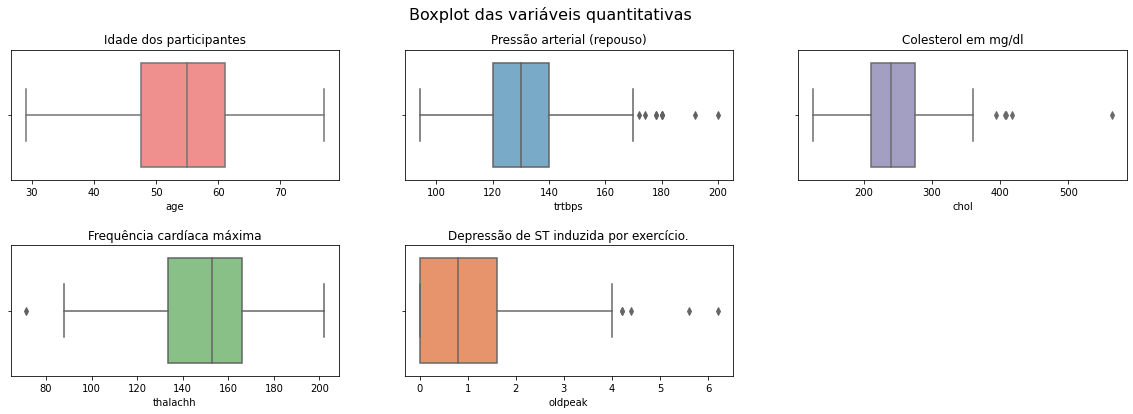

In [ ]:
# boxplot com a biblioteca seaborn
my_palette = sns.color_palette(['salmon','sandybrown', 'lightgreen','steelblue','mediumorchid'])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))

#titulo da figura
fig.suptitle('Boxplot das variáveis quantitativas', fontsize=16)

# Aumentar o espaço vertical entre os subplots
fig.subplots_adjust(hspace=0.5)

# Traçar uma boxplot em cada subplot
sns.boxplot(x='age', data=df, ax=axes[0, 0], palette='spring')
axes[0, 0].set_title('Idade dos participantes')

sns.boxplot(x='trtbps', data=df, ax=axes[0, 1], palette='Blues_r')
axes[0,1].set_title('Pressão arterial (repouso)')

sns.boxplot(x='chol', data=df, ax=axes[0, 2], palette='Purples')
axes[0,2].set_title('Colesterol em mg/dl')

sns.boxplot(x='thalachh', data=df, ax=axes[1, 0], palette='Accent')
axes[1,0].set_title('Frequência cardíaca máxima')

sns.boxplot(x='oldpeak', data=df, ax=axes[1, 1], palette='OrRd')
axes[1,1].set_title('Depressão de ST induzida por exercício.')

# Desativar os eixos do último subplot
axes[1, 2].set_axis_off()

# Exibir o plot
plt.show()


Dos boxplots anteriores, podemos analisar a existência de outliers nas colunas referentes à 
- Pressão arterial
- Colesterol 
- Frequência cardíaca máxima 
- Depressão ST induzida por exercício

Assim, vê-se necessário retirá-los de modo que não tendenciem nossas análises

In [ ]:
# verificando quais são os outliers de trtbps
df['trtbps'].nlargest(6)

223    200
248    192
110    180
203    180
266    180
101    178
Name: trtbps, dtype: int64

In [ ]:
df['oldpeak'].nlargest(4)

204    6.2
221    5.6
291    4.4
101    4.2
Name: oldpeak, dtype: float64

In [ ]:
df['chol'].nlargest(4) 

85     564
28     417
246    409
220    407
Name: chol, dtype: int64

In [ ]:
df['thalachh'].nsmallest(20)

272     71
243     88
297     90
262     95
136     96
233     96
216     97
198     99
226    103
269    103
139    105
244    105
276    105
252    106
165    108
264    108
187    109
234    109
95     111
202    111
Name: thalachh, dtype: int64

#### Idade

In [ ]:
df['age'].nlargest(5)

238    77
144    76
129    74
25     71
60     71
Name: age, dtype: int64

In [ ]:
df.loc[df['age'] > 77] = 77
df['age'].nlargest(2)

238    77
144    76
Name: age, dtype: int64

In [ ]:
print(df['age'].nsmallest(10))

72     29
58     34
125    34
65     35
157    35
227    35
239    35
1      37
115    37
163    38
Name: age, dtype: int64


In [ ]:
df.loc[df['age'] < 30] = 30 
df['age'].nsmallest(10)

72     30
58     34
125    34
65     35
157    35
227    35
239    35
1      37
115    37
163    38
Name: age, dtype: int64

#### Pressão arterial


In [ ]:
df['trtbps'].nlargest(6)

223    200
248    192
110    180
203    180
266    180
101    178
Name: trtbps, dtype: int64

In [ ]:
df.loc[df['trtbps'] > 170] = 170
df['trtbps'].nlargest(4)

8      170
101    170
110    170
152    170
Name: trtbps, dtype: int64

In [ ]:
df.loc[df['trtbps'] < 94] = 94
df['trtbps'].nsmallest(10)

71      94
72      94
124     94
66     100
89     100
253    100
273    100
87     101
82     102
84     102
Name: trtbps, dtype: int64

#### Depressao ST

In [ ]:
df['oldpeak'].nlargest(4)

8      170.0
101    170.0
110    170.0
203    170.0
Name: oldpeak, dtype: float64

In [ ]:
df.loc[df['oldpeak'] > 4] = 4
df['oldpeak'].nlargest(10)

8      4.0
72     4.0
101    4.0
110    4.0
203    4.0
204    4.0
220    4.0
221    4.0
223    4.0
241    4.0
Name: oldpeak, dtype: float64

#### Colesterol

In [ ]:
df['chol'].nlargest(4)

85     564
28     417
246    409
220    407
Name: chol, dtype: int64

In [ ]:
df.loc[df['chol'] > 360] = 360
df['chol'].nlargest(4)

28    360
39    360
85    360
96    360
Name: chol, dtype: int64

In [ ]:
df.loc[df['chol'] < 126] = 126
df['chol'].nsmallest(10)

8      126
72     126
101    126
110    126
111    126
203    126
204    126
221    126
223    126
241    126
Name: chol, dtype: int64

#### tssd

In [ ]:
df['thalachh'].nsmallest(20)

272     71
243     88
297     90
262     95
136     96
233     96
216     97
198     99
226    103
269    103
139    105
244    105
276    105
252    106
165    108
264    108
187    109
234    109
95     111
202    111
Name: thalachh, dtype: int64

In [ ]:
# ajustando valores para thalachh
df.loc[df['thalachh'] < 80] = 80
df['thalachh'].nsmallest(20)

272     80
243     88
297     90
262     95
136     96
233     96
216     97
198     99
226    103
269    103
139    105
244    105
276    105
252    106
165    108
264    108
187    109
234    109
95     111
202    111
Name: thalachh, dtype: int64

In [ ]:
df.loc[:,'sex'].drop_duplicates()

0        1
2        0
8      126
28     360
272     80
Name: sex, dtype: int64

In [ ]:
df_sex = df.drop(df[df['sex'] == 77].index, inplace=False)
df_sex.loc[:,'sex'].drop_duplicates()

0        1
2        0
8      126
28     360
272     80
Name: sex, dtype: int64

In [ ]:
# extremos 
_ = df['age'].min()
print(f'Idade mínima: {_} anos')
_ = df['age'].max()
print(f'Idade máxima: {_} anos')

Idade mínima: 34 anos
Idade máxima: 360 anos


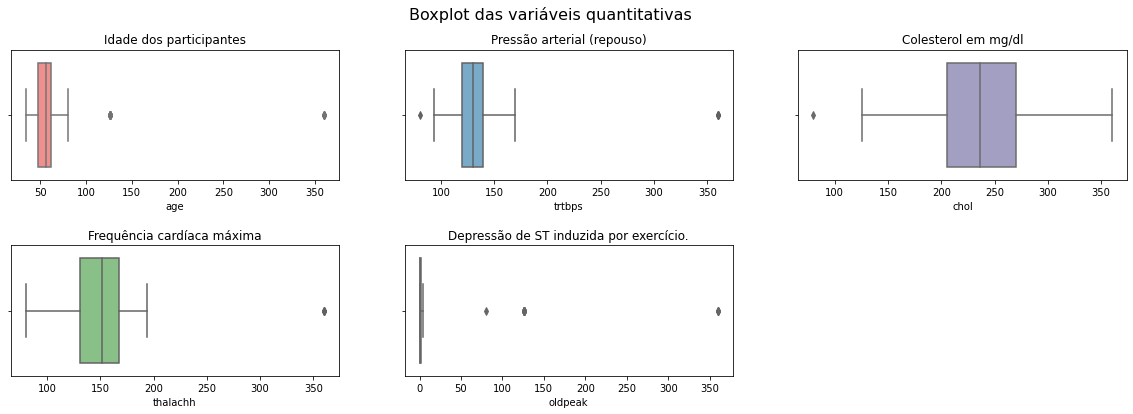

In [ ]:
# boxplot sem outliers

fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))

#titulo da figura
fig2.suptitle('Boxplot das variáveis quantitativas', fontsize=16)

# Aumentar o espaço vertical entre os subplots
fig2.subplots_adjust(hspace=0.5)

# Traçar uma boxplot em cada subplot
sns.boxplot(x='age', data=df, ax=axes2[0, 0], palette='spring')
axes2[0, 0].set_title('Idade dos participantes')

sns.boxplot(x='trtbps', data=df, ax=axes2[0, 1], palette='Blues_r')
axes2[0,1].set_title('Pressão arterial (repouso)')

sns.boxplot(x='chol', data=df, ax=axes2[0, 2], palette='Purples')
axes2[0,2].set_title('Colesterol em mg/dl')

sns.boxplot(x='thalachh', data=df, ax=axes2[1, 0], palette='Accent')
axes2[1,0].set_title('Frequência cardíaca máxima')

sns.boxplot(x='oldpeak', data=df, ax=axes2[1, 1], palette='OrRd')
axes2[1,1].set_title('Depressão de ST induzida por exercício.')

# Desativar os eixos do último subplot
axes2[1, 2].set_axis_off()

# Exibir o plot
plt.show()


# 3. Análise descritiva

## 3.1 Análise Univariada

## 3.1 Análise Univariada

### Idade

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df.age, kde=True)
plt.title('Histograma de idade e curva de distribuição', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Contagem', fontsize=14);

In [ ]:
df['age'].describe()

In [ ]:
Do histograma mostrado acima, extraímos que há uma maior concentração dos participantes em idades de **50** a **60** anos. Note que trata-se de um intervalo condizente, posto que a **média** é de aproximadamente **55** anos.
Além disso, é interessante observar que a curva de distribuição pode ser extrapolada como próxima ao compostamento de uma **distribuição Gaussiana**.

### Sexo

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.title('Distribuição de participantes por sexo', size = 16)
ax = sns.countplot(data=df_sex, x='sex', palette='Set2')

ax.set_xlabel('Idade', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14);
ax.set_xticklabels(['Feminino', 'Masculino'])


# Adiciona as porcentagens nas barras
total = len(df_sex['sex'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=11)
plt.show()